In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.multiclass import OneVsRestClassifier

# 1. Load data, EDA and prepare data

## Load data and EDA

In [4]:
# Load data

df = pd.read_excel('churn.xlsx')

In [5]:
df.head(30)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [6]:
df.info() # we can see there are not any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


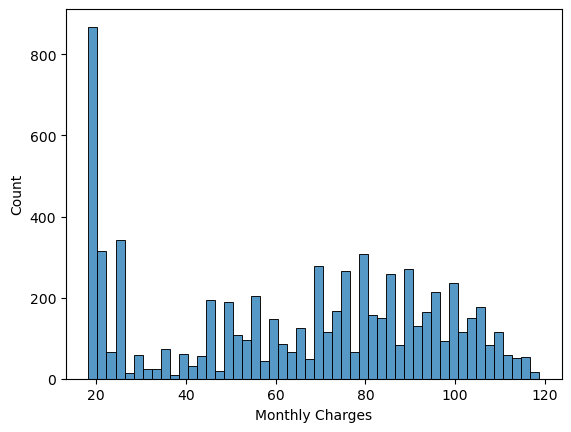

In [8]:
sns.histplot(df['Monthly Charges'], bins =50);

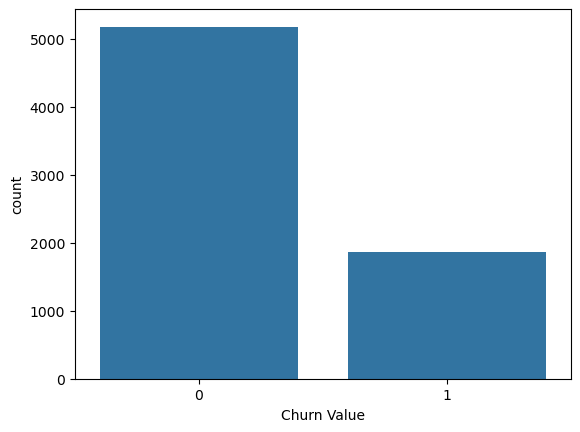

In [9]:
sns.countplot(df, x = 'Churn Value');

In [10]:
df['Country'].unique(), df['State'].unique()

(array(['United States'], dtype=object), array(['California'], dtype=object))

In [11]:
len(df['City'].unique()) , len(df['Zip Code'].unique())

(1129, 1652)

In [12]:
# Removing data that is unique for the whole dataset (such as Country and State) or redondant (such as Churn Label)
# Also, internal data to the operator will be removed (Customer Id, Count)
# Coordonates has also been removed as to many to be used in the classification
# Total charges is actually cumulated from Monthly Charges


# 1st transformation
df = df.drop(['CustomerID','Count','Country','State','City','Lat Long','Latitude','Longitude','Total Charges','Churn Label','Churn Score','CLTV','Churn Reason'], axis=1)

In [13]:
# checking service data
# df[['Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
#        'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
#        'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
#        'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
#        'Churn Score', 'CLTV', 'Churn Reason']]

## Encode Features and Prepare data

In [15]:
df.columns

Index(['Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Churn Value'],
      dtype='object')

In [16]:
# 2nd transformation
# grouping the zip codes by prefixes

def get_prefix(data):
    data['ZC_prefix']=data['Zip Code'].astype('float').div(1000)
    data['ZC_prefix']=data['ZC_prefix'].astype(int)
    data= data.drop(['Zip Code'], axis = 1)
    return(data)

get_prefix(df)

df['ZC_prefix'].value_counts()

ZC_prefix
95    1864
92    1310
93    1052
90     805
94     800
91     760
96     452
Name: count, dtype: int64

In [17]:
# 3rd transformation
# Enconding binary categorical variables

oh_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = oh_encoder.fit_transform(df[['Gender','Senior Citizen', 'Partner','Dependents', 'Phone Service','Paperless Billing']])
encoded_df = pd.DataFrame(encoded_features, columns=oh_encoder.get_feature_names_out(['Gender','Senior Citizen', 'Partner','Dependents', 'Phone Service','Paperless Billing']),index=df.index)
df = df.drop(columns=['Gender','Senior Citizen', 'Partner','Dependents', 'Phone Service','Paperless Billing']).join(encoded_df, how='left')



In [18]:
df

,Zip Code,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,...,Payment Method,Monthly Charges,Churn Value,ZC_prefix,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Paperless Billing_Yes
0,90003,2,No,DSL,Yes,Yes,No,No,No,No,...,Mailed check,53.85,1,90,1.0,0.0,0.0,0.0,1.0,1.0
1,90005,2,No,Fiber optic,No,No,No,No,No,No,...,Electronic check,70.70,1,90,0.0,0.0,0.0,1.0,1.0,1.0
2,90006,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,...,Electronic check,99.65,1,90,0.0,0.0,0.0,1.0,1.0,1.0
3,90010,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,...,Electronic check,104.80,1,90,0.0,0.0,1.0,1.0,1.0,1.0
4,90015,49,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,...,Bank transfer (automatic),103.70,1,90,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,92285,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,...,Bank transfer (automatic),21.15,0,92,0.0,0.0,0.0,0.0,1.0,1.0
7039,92301,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,...,Mailed check,84.80,0,92,1.0,0.0,1.0,1.0,1.0,1.0
7040,92304,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,...,Credit card (automatic),103.20,0,92,0.0,0.0,1.0,1.0,1.0,1.0
7041,92305,11,No phone service,DSL,Yes,No,No,No,No,No,...,Electronic check,29.60,0,92,0.0,0.0,1.0,1.0,0.0,1.0


In [19]:
# 4th transformation
# Enconding non binary categorical variables

def encode_label_data(data):
    label_encoder = LabelEncoder()
    data['Internet Service encoded']=label_encoder.fit_transform(data['Internet Service'])
    data['Contract encoded']=label_encoder.fit_transform(data['Contract'])
    data['Payment Method encoded']=label_encoder.fit_transform(data['Payment Method'])
    data= data.drop(['Internet Service','Contract','Payment Method'], axis = 1)
    return(data)

df=encode_label_data(df)

#Internet Service :
# Fiber optic       1
# DSL               0
# No                2  


# Contract
# Month-to-month  0 
# Two year        2
# One year        1

#Payment Method 
# Electronic check           2
# Mailed check               3
# Bank transfer (automatic)  0
# Credit card (automatic)    1

In [20]:
df

,Zip Code,Tenure Months,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Monthly Charges,...,ZC_prefix,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Paperless Billing_Yes,Internet Service encoded,Contract encoded,Payment Method encoded
0,90003,2,No,Yes,Yes,No,No,No,No,53.85,...,90,1.0,0.0,0.0,0.0,1.0,1.0,0,0,3
1,90005,2,No,No,No,No,No,No,No,70.70,...,90,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2
2,90006,8,Yes,No,No,Yes,No,Yes,Yes,99.65,...,90,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2
3,90010,28,Yes,No,No,Yes,Yes,Yes,Yes,104.80,...,90,0.0,0.0,1.0,1.0,1.0,1.0,1,0,2
4,90015,49,Yes,No,Yes,Yes,No,Yes,Yes,103.70,...,90,1.0,0.0,0.0,1.0,1.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,92285,72,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,21.15,...,92,0.0,0.0,0.0,0.0,1.0,1.0,2,2,0
7039,92301,24,Yes,Yes,No,Yes,Yes,Yes,Yes,84.80,...,92,1.0,0.0,1.0,1.0,1.0,1.0,0,1,3
7040,92304,72,Yes,No,Yes,Yes,No,Yes,Yes,103.20,...,92,0.0,0.0,1.0,1.0,1.0,1.0,1,1,1
7041,92305,11,No phone service,Yes,No,No,No,No,No,29.60,...,92,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2


In [21]:
df_copy = df

#5th transformation
# removing services that were linked to internet service or phone service
df = df.drop(columns=['Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zip Code                  7043 non-null   int64  
 1   Tenure Months             7043 non-null   int64  
 2   Monthly Charges           7043 non-null   float64
 3   Churn Value               7043 non-null   int64  
 4   ZC_prefix                 7043 non-null   int64  
 5   Gender_Male               7043 non-null   float64
 6   Senior Citizen_Yes        7043 non-null   float64
 7   Partner_Yes               7043 non-null   float64
 8   Dependents_Yes            7043 non-null   float64
 9   Phone Service_Yes         7043 non-null   float64
 10  Paperless Billing_Yes     7043 non-null   float64
 11  Internet Service encoded  7043 non-null   int64  
 12  Contract encoded          7043 non-null   int64  
 13  Payment Method encoded    7043 non-null   int64  
dtypes: float

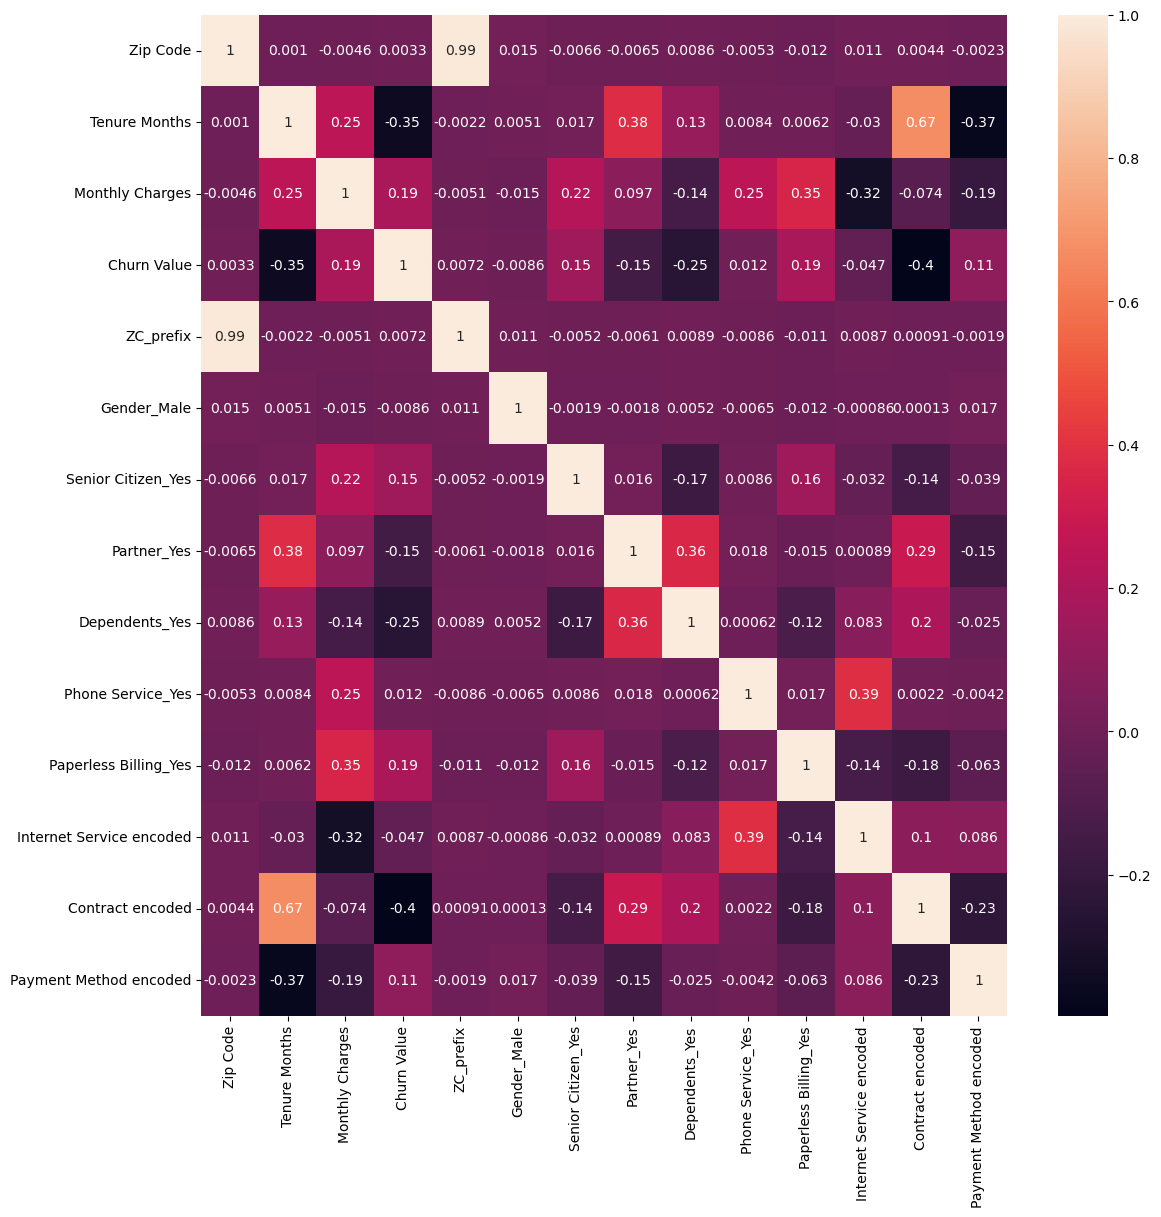

In [23]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(),annot = True);

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df.select_dtypes(include=[float, int]).drop('Churn Value', axis=1)
y = df['Churn Value']

# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['Tenure Months', 'Monthly Charges', 'Dependents_Yes',
       'Paperless Billing_Yes', 'Contract encoded'],
      dtype='object')


# 2. Classifications

## 2.1 Logistic Regression

##### After checking the heatmap, for the Logistic Regression we decided to keep the following features : tenure months, monthly charges, churn value (target), sr citizen yes, partner yes, dependent yes, paperless billing yes, contract encoded, payment method encoded

In [28]:
selected_columns=['Tenure Months', 
        'Monthly Charges',
        'Senior Citizen_Yes', 
        'Partner_Yes', 
        'Dependents_Yes', 
        'Phone Service_Yes',
        'Paperless Billing_Yes',
        'Internet Service encoded', 
        'Contract encoded', 
        'Payment Method encoded']

In [29]:
# X and y

X = df[['Tenure Months', 
        'Monthly Charges',
        'Senior Citizen_Yes', 
        'Partner_Yes', 
        'Dependents_Yes', 
        'Phone Service_Yes',
        'Paperless Billing_Yes',
        'Internet Service encoded', 
        'Contract encoded', 
        'Payment Method encoded']]
y = df['Churn Value']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [31]:
# Scale data

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
# Create model

# Initializing the Logistic Regression model
model = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=1000))

In [33]:
# Model parameters

# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values
C = np.logspace(0, 4, 10)

param_grid = {'estimator__C':C,'estimator__penalty':penalty}

In [34]:
# Obtain C value
grid_model = GridSearchCV(model, param_grid=param_grid, verbose =1)
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                        solver='saga')),
             param_grid={'estimator__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2']},
             verbose=1)

In [35]:
grid_model.best_params_

{'estimator__C': 1.0, 'estimator__penalty': 'l1'}

In [36]:
# Model coefficients

# creating a new model with the parameters found using grid search
model_lr = LogisticRegression(C = 1, solver='saga',max_iter=1000, verbose = 1)
model_lr.fit(scaled_X_train, y_train)

convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1, max_iter=1000, solver='saga', verbose=1)

In [37]:
model_lr.coef_

array([[-0.99750536,  0.88845015,  0.08249396,  0.13876131, -0.63114111,
        -0.28028515,  0.22055038,  0.12872543, -0.74081411,  0.06769641]])

In [38]:
# getting the values for x and y for the barplot

x_bar = X_train.columns.to_list()
y_bar = [coeff for item in model_lr.coef_ for coeff in item]

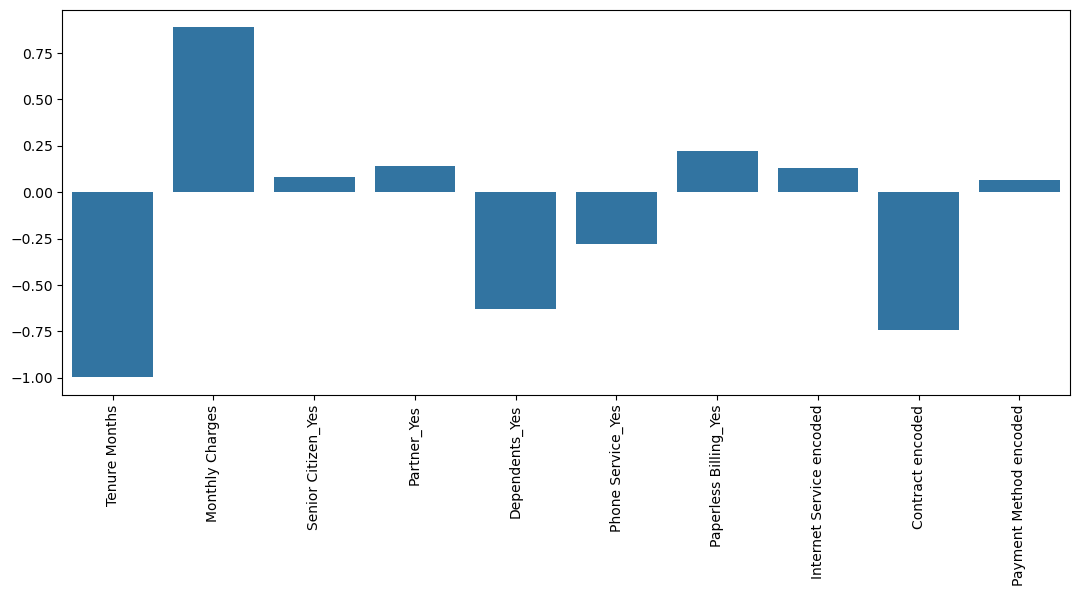

In [39]:
# Barplot of coefficients

plt.figure(figsize = (13,5))
ax = sns.barplot(x = x_bar , y = y_bar);
ax.tick_params(axis='x', rotation=90)

In [40]:
# Confusion matrix

y_pred = model_lr.predict(scaled_X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[902 107]
 [177 223]]


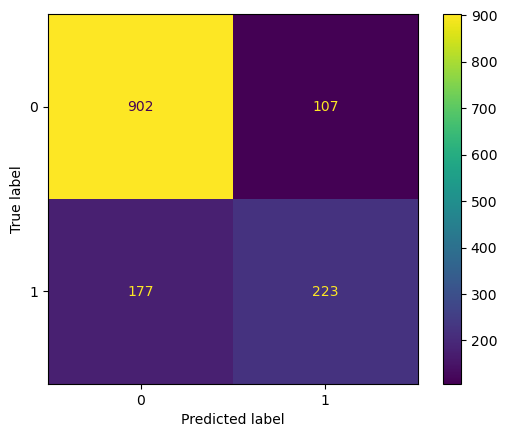

In [41]:
# Confusion matrix plot

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm, display_labels=model_lr.classes_)
disp.plot()
plt.show()

In [42]:
# Classification report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1009
           1       0.68      0.56      0.61       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



In [43]:
# Null accuracy
1009/(1009+400) # since the value is smaller than the accuracy we are confident of the model

0.71611071682044

<function matplotlib.pyplot.show(close=None, block=None)>

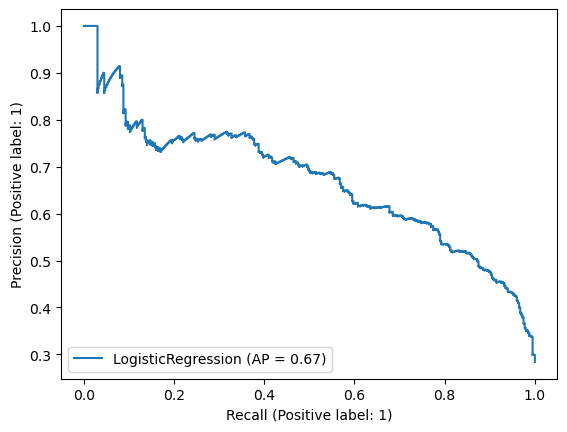

In [44]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=model_lr, X= scaled_X_test, y=y_test)
plt.show

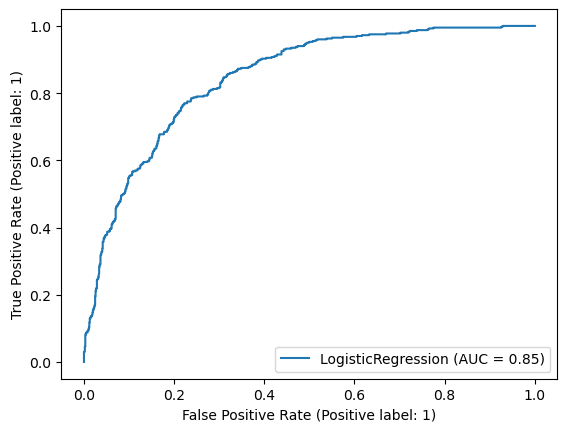

In [45]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=model_lr, X=scaled_X_test, y=y_test)
plt.show()

#### Checking if a smaller value for C is possible

In [47]:
# Trying smaller values for C

param_grid = {'estimator__C':[0.01,0.05,0.1,1],'estimator__penalty':penalty}

In [48]:
# Obtain C value

# testing with cv = 10, when cv was equal to 5, the best value for C was still 1

grid_model2 = GridSearchCV(model, cv=10, param_grid=param_grid, verbose =1)
grid_model2.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                        solver='saga')),
             param_grid={'estimator__C': [0.01, 0.05, 0.1, 1],
                         'estimator__penalty': ['l1', 'l2']},
             verbose=1)

In [49]:
grid_model2.best_params_

{'estimator__C': 1, 'estimator__penalty': 'l2'}

In [50]:
# creating a new model with the parameters found using grid search
model_lr2 = LogisticRegression(C = 0.01, solver='saga',max_iter=1000, verbose = 1)
model_lr2.fit(scaled_X_train, y_train)

convergence after 18 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.01, max_iter=1000, solver='saga', verbose=1)

In [51]:
y_pred2 = model_lr2.predict(scaled_X_test)

cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[922  87]
 [204 196]]


In [52]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1009
           1       0.68      0.56      0.61       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



Changing the value of C did not improve the accuracy

## Trying more variables for the logistic regression

In [55]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = encoder.fit_transform(df_copy[['Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']])

encoded_df_copy = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']),index=df_copy.index)
encoded_df_copy

df_copy = df_copy.drop(columns=['Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']).join(encoded_df_copy, how='left')

In [56]:
df_copy

,Zip Code,Tenure Months,Monthly Charges,Churn Value,ZC_prefix,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,...,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes
0,90003,2,53.85,1,90,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90005,2,70.70,1,90,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90006,8,99.65,1,90,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,90010,28,104.80,1,90,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,90015,49,103.70,1,90,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,92285,72,21.15,0,92,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7039,92301,24,84.80,0,92,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
7040,92304,72,103.20,0,92,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7041,92305,11,29.60,0,92,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


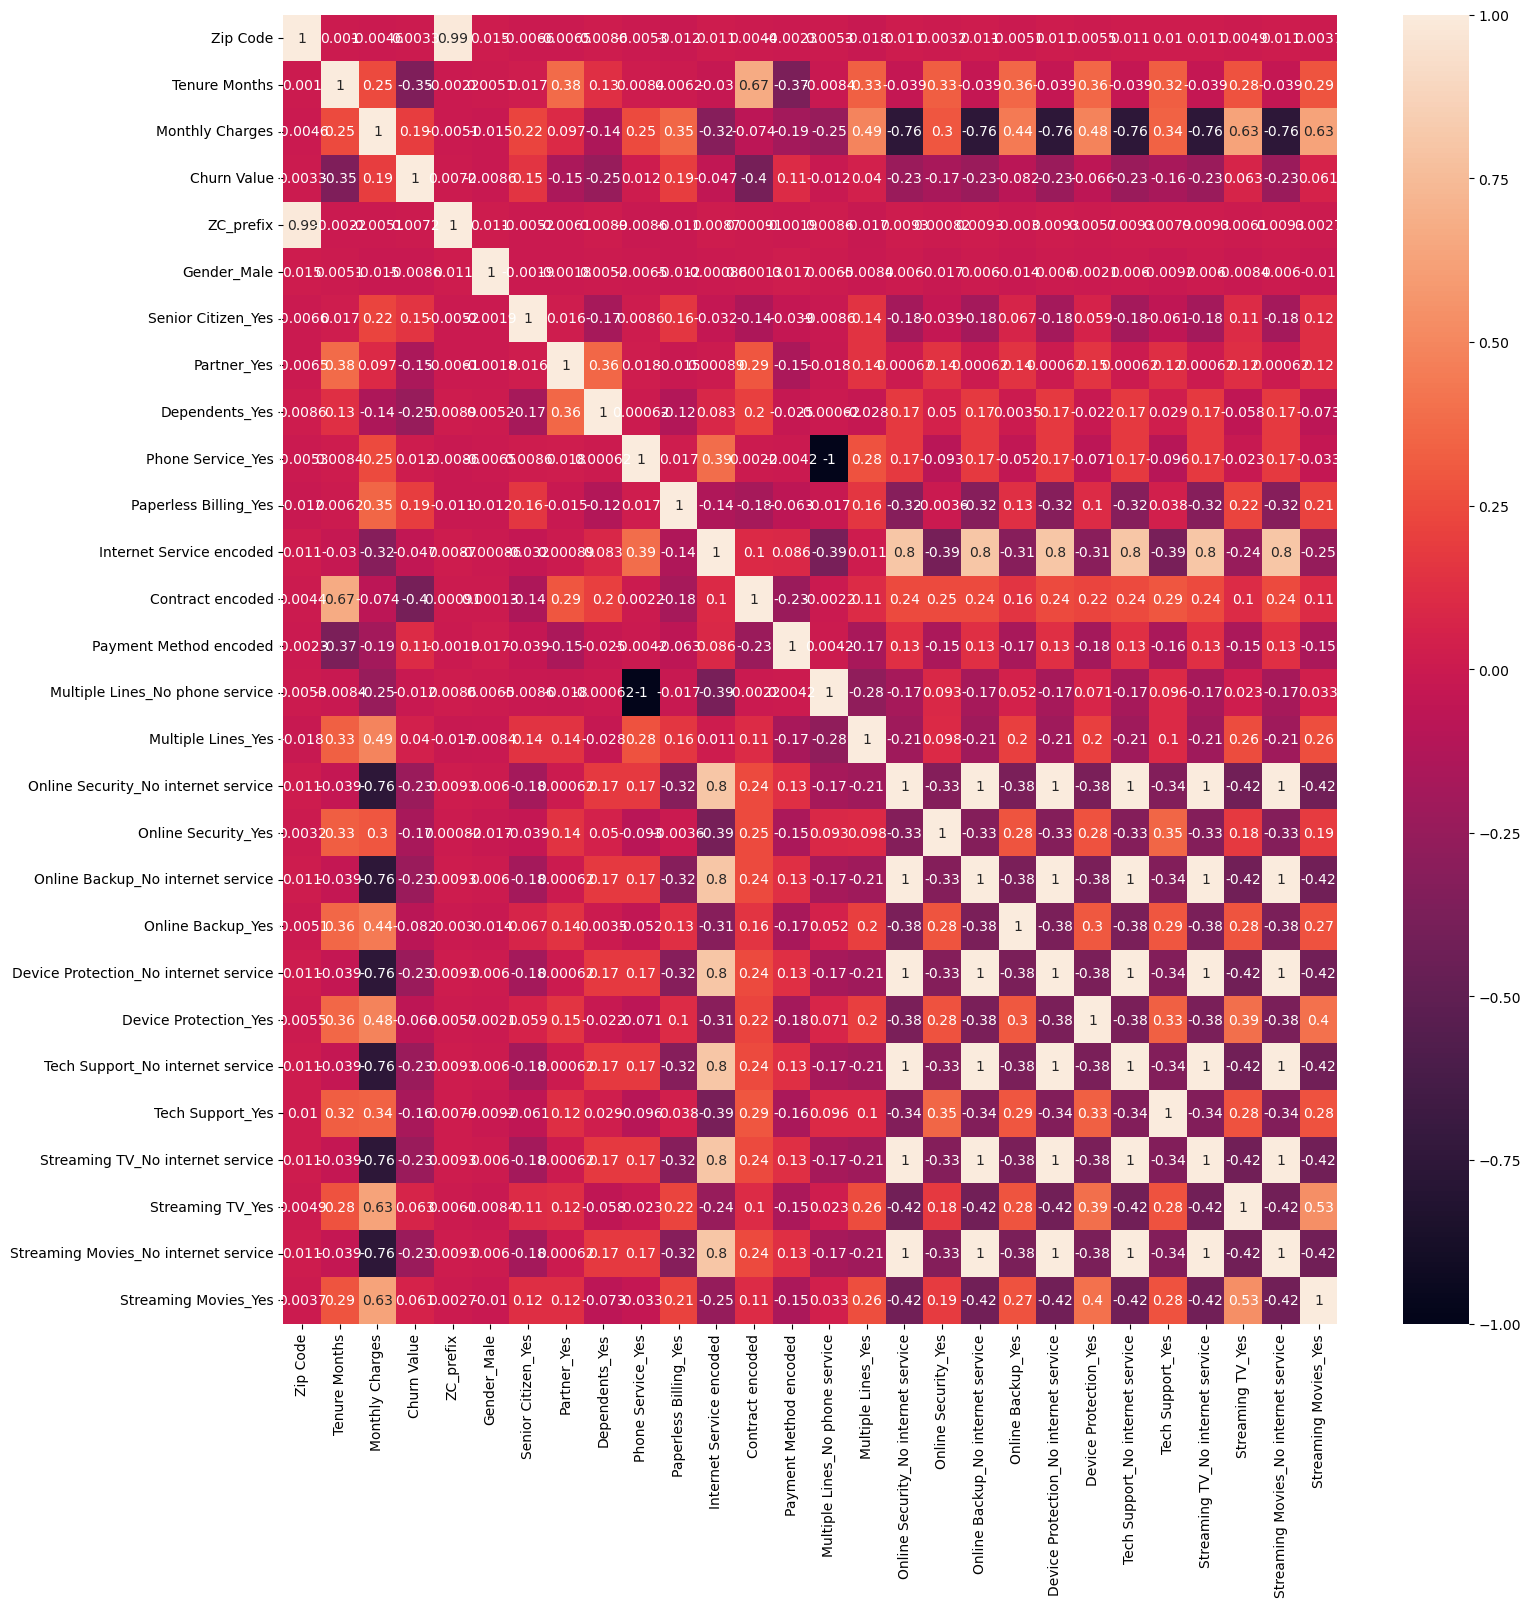

In [57]:
plt.figure(figsize = (17,17))
sns.heatmap(df_copy.corr(),annot = True);

In [58]:
# X and y

X = df_copy.drop(['Churn Value','ZC_prefix', 'Phone Service_Yes','Monthly Charges','Gender_Male','Senior Citizen_Yes','Payment Method encoded'], axis = 1)
y = df_copy['Churn Value']

In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [60]:
# Scale data

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [61]:
# Create model

# Initializing the Logistic Regression model
model = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=1000))

In [62]:
# Model parameters

# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values
C = np.logspace(0, 4, 10)

param_grid3 = {'estimator__C':C,'estimator__penalty':penalty}

In [63]:
# Obtain C value
grid_model3 = GridSearchCV(model,param_grid=param_grid, verbose =1)
grid_model3.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                        solver='saga')),
             param_grid={'estimator__C': [0.01, 0.05, 0.1, 1],
                         'estimator__penalty': ['l1', 'l2']},
             verbose=1)

In [64]:
grid_model3.best_params_

{'estimator__C': 0.01, 'estimator__penalty': 'l2'}

In [65]:
# Model coefficients

# creating a new model with the parameters found using grid search
model_lr3 = LogisticRegression(C = 0.01, solver='saga',max_iter=1000)
model_lr3.fit(scaled_X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, solver='saga')

In [66]:
model_lr3.coef_

array([[ 0.00769976, -0.69730006,  0.0585978 , -0.48808216,  0.18923493,
         0.39271477, -0.5271595 ,  0.04738589,  0.14194594, -0.14905276,
        -0.19560931, -0.14905276, -0.05582073, -0.14905276, -0.0017661 ,
        -0.14905276, -0.1808283 , -0.14905276,  0.11962912, -0.14905276,
         0.10216473]])

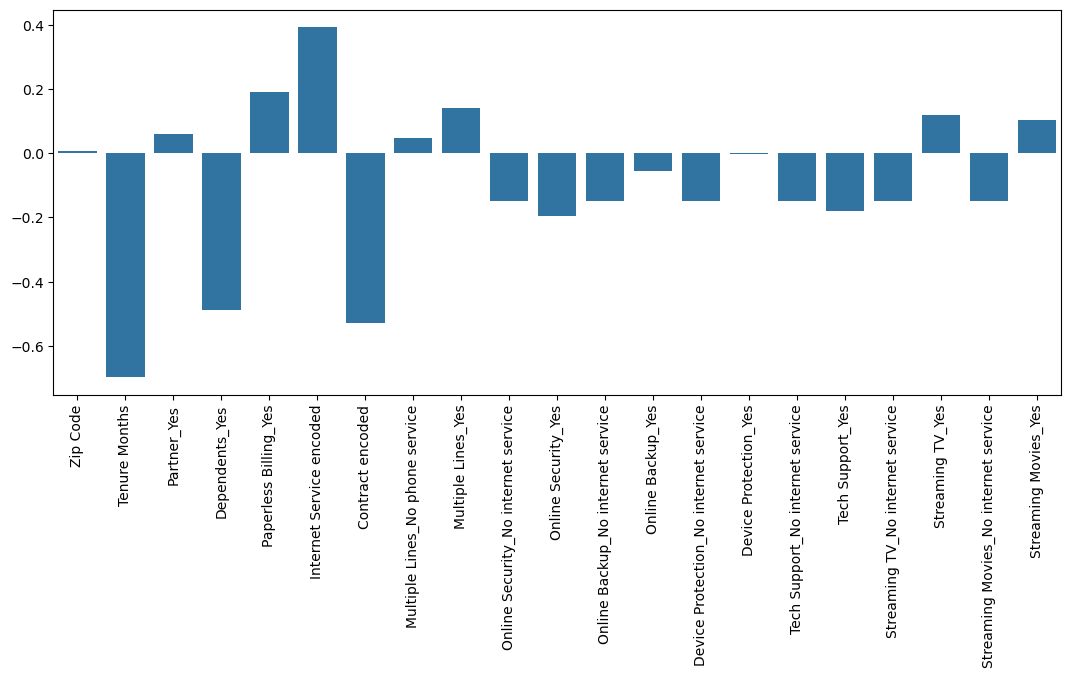

In [67]:
# getting the values for x and y for the barplot

x_bar = X_train.columns.to_list()
y_bar = [coeff for item in model_lr3.coef_ for coeff in item]

# Barplot of coefficients

plt.figure(figsize = (13,5))
ax = sns.barplot(x = x_bar , y = y_bar);
ax.tick_params(axis='x', rotation=90)

In [68]:
# Confusion matrix

y_pred3 = model_lr3.predict(scaled_X_test)

cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[905 104]
 [180 220]]


In [69]:
# Classification report

report = classification_report(y_test, y_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1009
           1       0.68      0.55      0.61       400

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.79      0.80      0.79      1409



#### Adding more parameters did not improve the accuracy of the model

## 2.2 Decision Tree

In [72]:
X = df[['Tenure Months', 'Monthly Charges','ZC_prefix', 'Gender_Male','Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes','Paperless Billing_Yes','Internet Service encoded', 'Contract encoded', 'Payment Method encoded']]
y = df['Churn Value']

The variables used here are the same found when the feature selection was done.

### 2.2.1 Decision Tree with Gini Index

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# Fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [78]:
# Initialize the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
# Fit the model on training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7889
Test set score: 0.7815


In [80]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7889
Test set score: 0.7815


In [81]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7889
Test set score: 0.7815


### 2.2.2 Decision Tree with Entropy

In [83]:
# Instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [84]:
y_pred_en = clf_en.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7815


In [85]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7889
Test set score: 0.7815


In [86]:
# Null Accuracy
most_frequent_class = y_test.mode()[0]

In [87]:
null_accuracy = (y_test == most_frequent_class).mean()
print("Null Accuracy:", null_accuracy)

Null Accuracy: 0.7243010752688172


In [88]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1684
           1       0.70      0.36      0.48       641

    accuracy                           0.78      2325
   macro avg       0.75      0.65      0.67      2325
weighted avg       0.77      0.78      0.76      2325



Precision: Out of the predicted churns, 70% were correct.

Recall: Out of the actual churns, 36% were identified.

Accuracy: Overall, 78% of the predictions were correct.

## 2.3 Random Forest

In [91]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create instance of model with default values
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [92]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8000


In [93]:
# View feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Monthly Charges             0.279021
Tenure Months               0.253941
ZC_prefix                   0.103220
Contract encoded            0.100160
Payment Method encoded      0.063294
Internet Service encoded    0.046739
Dependents_Yes              0.037706
Gender_Male                 0.029557
Paperless Billing_Yes       0.029392
Partner_Yes                 0.027536
Senior Citizen_Yes          0.021592
Phone Service_Yes           0.007843
dtype: float64

In [94]:
feature_scores.sum()

0.9999999999999999

In [95]:
top_features = feature_scores.index[:12]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [175]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}


In [183]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_selected, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [185]:
# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search_rf.best_params_}")

# Print the best score achieved
print(f"Best score achieved: {grid_search_rf.best_score_}")

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score achieved: 0.8050034149936194


In [187]:
# Evaluate the model on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)

# Print classification report and confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1522  162]
 [ 285  356]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1684
           1       0.69      0.56      0.61       641

    accuracy                           0.81      2325
   macro avg       0.76      0.73      0.74      2325
weighted avg       0.80      0.81      0.80      2325



In [194]:
most_frequent_class = y_test.mode()[0]
null_accuracy = (y_test == most_frequent_class).mean() * 100
print(f"Null Accuracy: {null_accuracy:.2f}%")

Null Accuracy: 72.43%


# 3. Final Model

#### Since we've got the best metrics with Random Forest, we chose it as our final model

In [199]:
top_features = feature_scores.index[:12]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [201]:
# Initialize the Random Forest Classifier
rf_model_selected = RandomForestClassifier(random_state=42)

# Fit the model on training data
rf_model_selected.fit(X_train_selected, y_train)

# Predict on the test data
y_pred_selected = rf_model_selected.predict(X_test_selected)

In [203]:
# Evaluate the model on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)

# Print classification report and confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1522  162]
 [ 285  356]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1684
           1       0.69      0.56      0.61       641

    accuracy                           0.81      2325
   macro avg       0.76      0.73      0.74      2325
weighted avg       0.80      0.81      0.80      2325



Precision: Out of all predicted churns, 68% were correct.

Recall: Out of all actual churns, 56% were identified.

F1-Score: Balance between precision and recall is 87%.

Accuracy: Overall, 81% of the predictions were correct

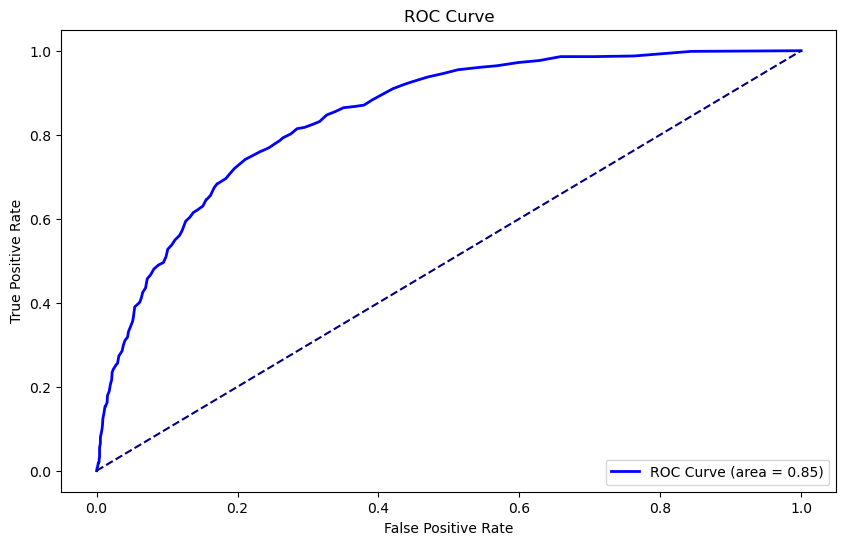

AUC: 0.85


In [206]:
from sklearn.metrics import roc_curve, roc_auc_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predict probabilities for ROC curve
y_prob = rf_model.predict_proba(X_test_selected)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

Our model's AUC of 0.85 shows it’s effective in distinguishing between the two classes, outperforming random guessing significantly. This means our model is generally good at predicting who will churn and who will not.

# 4. Prediction

### Prediction using the final Logistic Regression model

In [211]:
# Chosen new data
new_data = pd.DataFrame({'CustomerID':['3999-AJIBL'],
                         'Count':[1], 
                         'Country':['United States'], 
                         'State':['California'], 
                         'City':['Los Angeles'], 
                         'Zip Code':[90010],
                         'Lat Long':['33.048013, -117.293953'], 
                         'Latitude':[33.048013], 
                         'Longitude':[117.293953], 
                         'Gender':['Female'], 
                         'Senior Citizen':['Yes'],
                         'Partner':['Yes'], 
                         'Dependents':['Yes'],
                         'Tenure Months':[28], 
                         'Phone Service':['Yes'],
                         'Multiple Lines':['Yes'], 
                         'Internet Service':['Yes'], 
                         'Online Security':['Yes'],
                         'Online Backup':['Yes'], 
                         'Device Protection':['Yes'], 
                         'Tech Support':['Yes'], 
                         'Streaming TV':['Yes'],
                         'Streaming Movies':['Yes'], 
                         'Contract':['Two year'], 
                         'Paperless Billing':['No'], 
                         'Payment Method':['Bank transfer (automatic)'],
                         'Monthly Charges':[70.70], 
                         'Total Charges':[4000.10], 
                         'Churn Label':[''], 
                         'Churn Value':[0],
                         'Churn Score':[0], 
                         'CLTV':[0], 
                         'Churn Reason':['']
})


In [213]:
# Transforming the data to predict like the data used in the model
# 1st transformation
new_data = new_data.drop(['CustomerID','Count','Country','State','City','Lat Long','Latitude','Longitude','Total Charges','Churn Label','Churn Score','CLTV','Churn Reason'], axis=1)

# 2nd transformation
new_data = get_prefix(new_data)

# 3rd transformation
encoded_features = oh_encoder.transform(new_data[['Gender','Senior Citizen', 'Partner','Dependents', 'Phone Service','Paperless Billing']])
encoded_new_data = pd.DataFrame(encoded_features, columns=oh_encoder.get_feature_names_out(['Gender','Senior Citizen', 'Partner','Dependents', 'Phone Service','Paperless Billing']))
new_data = new_data.drop(columns=['Gender','Senior Citizen', 'Partner','Dependents', 'Phone Service','Paperless Billing']).join(encoded_new_data, how='left')


# 4th transformation
new_data=encode_label_data(new_data)

#5th transformation
# removing services that were linked to internet service or phone service
new_data = new_data.drop(columns=['Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies'])



In [275]:
# Applying the RF model to the new data

trained_features = rf_model.feature_names_in_


# Make sure the DataFrame columns are in the correct order
new_person_df = new_data[trained_features]


# Predict using the trained Random Forest model
prediction = rf_model.predict(new_person_df)
prediction_prob = rf_model.predict_proba(new_person_df)

print(f"Prediction: {prediction[0]}")
print(f"Prediction Probability: {prediction_prob[0]}")


Prediction: 0
Prediction Probability: [0.92 0.08]


### Thank you!